<a href="https://colab.research.google.com/github/ProfKaromo/Data_Science_Codes/blob/main/DSLesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Joseph Karomo Data Science Codes**

In [2]:
import pandas  
# Read data, manipulate your data, select columns, basic stats, check empties.
data = pandas.read_csv("https://modcom.co.ke/data/datasets/school.csv", 
                       parse_dates=['bday','enrolldate', 'expgradate'])
data.head(2)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,1995-03-22,NaT,NaT,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1995-01-01,NaT,NaT,NaN,Philosophy,0.0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0


In [3]:
# Shape of the data
# From the output we see 435 rows by 23 columns
data.shape

(435, 23)

In [4]:
# Select columns
data['Rank']
# Select multiple columns
data[['Rank','Weight', 'Height', 'Major']]

,Rank,Weight,Height,Major
0,NaN,NaN,72.35,NaN
1,NaN,179.20,70.66,Philosophy
2,NaN,198.52,70.68,NaN
3,NaN,198.34,NaN,business administration
4,NaN,128.17,67.43,NaN
...,...,...,...,...
430,4.0,NaN,NaN,accounting
431,4.0,131.92,68.50,NaN
432,4.0,130.07,68.10,nursing
433,4.0,157.26,69.27,Nursing


In [5]:
# Basic Stats
data[['Weight', 'Height', 'SleepTime','StudyTime']].mean()  # max(), min(), std(), median(), sum(), product()

Weight       181.031569
Height        68.031765
SleepTime      5.461538
StudyTime      7.208651
dtype: float64

In [6]:
# Cleaning, Do we have empties? Do we have unwanted columns, Do we have unwanted row?
data.isnull().sum()
# Missing Data... Less than 2%, its Fine 

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [7]:
# Fill Empties/Imputation - Qualitative Data
data['Gender'].fillna(2.0, inplace = True)
data['Rank'].fillna(0.0, inplace = True)
data['Major'].fillna('Unknown', inplace = True)
data['Smoking'].fillna(3.0, inplace = True)
# TODO : Fill  -  state, LiveOnCampus, CommuteTime
#data['Smoking'].head(50)
#data.isnull().sum()

In [8]:
# Fill Empties/Imputation - Quantitative Data
meanweight = data['Weight'].mean()
data['Weight'].fillna(meanweight, inplace = True)
# TODO  Height, Reading, Writing, English, Sprint

In [9]:
# Replacing
data['Gender'].replace({0:'Male',
                        1:'Female',
                        2:'Neutral'},
                         inplace = True)

data['LiveOnCampus'].replace({0:'Off Campus',
                              1:'On Campus'},
                              inplace = True)

data['HowCommute'].replace({1:'Walk',
                              2:'Bike',
                              3:'Car',
                              4:'Public Transit',
                              5:'Other'},
                              inplace = True)
# TODO - Rank, Gender, other categorical

In [10]:
# Drop rows
data.dropna(subset = ['bday', 'Math', 'Reading'], inplace = True)
#data.isnull().sum()
data.shape

(404, 23)

In [11]:
# Dropping a whole column
# in pandas axis-1 refer to vertical/columns
# in pandas axis-0 refer to horizontal/rows
data.drop(['MileMinDur'], axis=1, inplace=True)
#data.isnull().sum()
data.shape

(404, 22)

In [12]:
# Duplicates
data.drop_duplicates()
data.shape

(404, 22)

In [ ]:
# Drop rows
# data = data[data['Gender'] !='Male']
# data = data[data['SleepTime'] ==7]
# data.shape

In [13]:
data.sample(n=1)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
18,44116,1992-03-16,NaT,NaT,0.0,Exorcise Science,Female,0,69.25,183.68,...,82.99,74.41,61.4,81.12,In state,On Campus,NaN,NaN,5.0,15.0


In [15]:
#data.nlargest(3, 'Weight')
data.nsmallest(1, 'Math')

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
72,44517,1995-03-11,2014-08-04,2020-05-11,1.0,Environmental Science,Female,1,66.07,137.0,...,69.81,70.58,35.32,70.73,In state,On Campus,NaN,NaN,5.0,NaN


In [14]:
# Descriptive stats
data.describe()

,ids,Rank,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,CommuteTime,SleepTime,StudyTime
count,404.000000,404.000000,404.000000,380.000000,404.000000,404.000000,346.000000,380.000000,404.00000,404.000000,375.000000,229.000000,372.000000,364.000000
mean,35170.185644,2.047030,0.420792,68.049526,182.242755,0.571782,6.593561,82.818526,82.10297,65.511658,79.608720,26.973799,5.478495,7.197802
std,8620.596048,1.183118,0.494298,5.354791,40.072745,0.948969,1.214216,6.843034,7.72514,8.420188,5.586828,9.949840,2.395429,4.366085
min,20183.000000,0.000000,0.000000,55.000000,101.710000,0.000000,4.503000,59.830000,55.11000,35.320000,64.060000,6.000000,0.000000,0.000000
25%,27745.750000,1.000000,0.000000,64.877500,157.977500,0.000000,5.617500,78.400000,77.12750,60.250000,75.740000,21.000000,4.000000,4.000000
50%,35309.500000,2.000000,0.000000,67.525000,181.031569,0.000000,6.598500,83.180000,81.98000,65.470000,79.150000,27.000000,5.000000,6.000000
75%,42562.500000,3.000000,1.000000,71.575000,199.125000,1.000000,7.458000,87.300000,87.37500,70.590000,84.000000,32.000000,7.000000,10.000000
max,49947.000000,4.000000,1.000000,84.410000,350.070000,3.000000,9.597000,101.950000,103.62000,93.780000,93.010000,64.000000,13.000000,23.000000


In [16]:
# Correlate
data.corr()

,ids,Rank,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,CommuteTime,SleepTime,StudyTime
ids,1.000000,-0.019089,-0.014015,0.053948,0.019103,0.074697,0.024987,-0.012683,-0.089034,-0.051184,0.066799,0.022775,0.077869,-0.002180
Rank,-0.019089,1.000000,-0.008465,0.026413,-0.031487,-0.017380,0.027590,0.082720,0.049367,0.011717,0.091490,-0.148586,-0.125145,0.401080
Athlete,-0.014015,-0.008465,1.000000,0.189593,-0.151662,-0.154483,-0.785718,-0.063661,-0.069080,-0.001068,-0.136377,0.077120,0.055462,-0.013899
Height,0.053948,0.026413,0.189593,1.000000,0.481186,-0.065874,-0.090049,-0.041604,0.001812,0.103317,-0.228285,-0.048578,-0.031366,-0.072219
Weight,0.019103,-0.031487,-0.151662,0.481186,1.000000,0.045923,-0.082949,0.042263,0.041955,0.157898,-0.132316,0.007260,-0.055655,0.045413
Smoking,0.074697,-0.017380,-0.154483,-0.065874,0.045923,1.000000,0.165609,-0.034348,-0.029091,-0.071078,0.009767,0.018692,-0.002693,-0.023761
Sprint,0.024987,0.027590,-0.785718,-0.090049,-0.082949,0.165609,1.000000,0.061301,0.044321,-0.105527,0.183701,-0.097588,-0.070234,-0.060035
English,-0.012683,0.082720,-0.063661,-0.041604,0.042263,-0.034348,0.061301,1.000000,0.354024,0.246917,0.371075,0.098018,-0.091425,-0.009731
Reading,-0.089034,0.049367,-0.069080,0.001812,0.041955,-0.029091,0.044321,0.354024,1.000000,0.520667,0.106644,0.032604,-0.032581,0.012774
Math,-0.051184,0.011717,-0.001068,0.103317,0.157898,-0.071078,-0.105527,0.246917,0.520667,1.000000,0.118396,0.101397,0.017168,0.066912


In [17]:
# Proportion - Categorical
data.groupby('Smoking').size()

Smoking
0.0    282
1.0     36
2.0     63
3.0     23
dtype: int64

In [18]:
# Average Math by Rank  -  Category 1, Continous - 2
data.groupby('Gender') ['Math','English'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Math,English
Gender,,
Female,64.251531,82.818209
Male,66.773817,82.706140
Neutral,68.690000,85.228750


In [19]:
# Average Math by Rank  -  Category 3, Continous - 2
data.groupby(['State', 'Rank', 'Gender']) ['Math','English'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Math    English
State        Rank Gender                       
In state     0.0  Female   60.438750  80.948750
                  Male     66.868889  86.920000
             1.0  Female   64.450612  82.303125
                  Male     65.843846  80.861020
                  Neutral  68.820000  82.245000
             2.0  Female   64.035938  82.210345
                  Male     67.862333  83.383571
                  Neutral  67.855000  77.770000
             3.0  Female   64.426571  84.025588
                  Male     66.886552  84.908214
                  Neutral  61.720000  90.180000
             4.0  Female   61.698889  82.172222
                  Male     69.998333  84.621000
Out of state 0.0  Female   57.733333  79.950000
                  Male     62.630000  85.335000
             1.0  Female   65.102778  83.221667
                  Male     67.019000  77.861111
                  Neutral  85.070000  88.310000
             2.0  Female   65.397500  85.717500
                  Male     62.431429  76.815714
                  Neutral  70.960000  87.150000
             3.0  Female   66.447692  82.545000
                  Male     63.840000  82.680000
             4.0  Female   62.309000  82.642222
                  Male     61.170000  82.200000

In [20]:
# Aggregate Continous Variable
data['Height'].agg(['sum', 'max', 'min', 'std', 'median'])

sum       25858.820000
max          84.410000
min          55.000000
std           5.354791
median       67.525000
Name: Height, dtype: float64

In [21]:
# Sorting
data.sort_values('English', ascending= False).head(2)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
12,38764,1993-05-22,NaT,NaT,0.0,Unknown,Male,1,65.21,139.95,...,101.95,74.45,66.80,88.50,In state,Off Campus,Car,29.0,4.0,2.0
338,23871,1991-11-20,2012-08-06,2018-05-14,3.0,military history,Male,0,NaN,297.21,...,100.78,73.73,60.88,83.99,In state,Off Campus,Car,22.0,4.0,6.0


In [22]:
# Apply Some function to columns and generate a new column
data = data.assign(Total=lambda data: data.Reading + data.Math + data.Writing)
data.head(2)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime,Total
0,43783,1995-03-22,NaT,NaT,0.0,Unknown,Male,0,72.35,181.031569,...,81.50,60.02,81.44,In state,On Campus,NaN,NaN,7.0,1.0,222.96
1,20278,1995-01-01,NaT,NaT,0.0,Philosophy,Male,0,70.66,179.200000,...,85.25,70.19,73.27,NaN,On Campus,NaN,NaN,5.0,2.0,228.71


In [23]:
data = data.assign(BMI=lambda data: data.Weight/(data.Height * data.Height))
data.head(2)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime,Total,BMI
0,43783,1995-03-22,NaT,NaT,0.0,Unknown,Male,0,72.35,181.031569,...,60.02,81.44,In state,On Campus,NaN,NaN,7.0,1.0,222.96,0.034584
1,20278,1995-01-01,NaT,NaT,0.0,Philosophy,Male,0,70.66,179.200000,...,70.19,73.27,NaN,On Campus,NaN,NaN,5.0,2.0,228.71,0.035891


In [24]:
# Add a new column, with > 50 - Pass/< 50 - Fail based on Math 
import numpy
pandas.set_option('display.max_columns', None)
data['Performance'] = numpy.where(data['Math'] >=65, "Passed", "Failed")
data.head(2)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime,Total,BMI,Performance
0,43783,1995-03-22,NaT,NaT,0.0,Unknown,Male,0,72.35,181.031569,0.0,7.978,88.24,81.50,60.02,81.44,In state,On Campus,NaN,NaN,7.0,1.0,222.96,0.034584,Failed
1,20278,1995-01-01,NaT,NaT,0.0,Philosophy,Male,0,70.66,179.200000,0.0,8.004,89.45,85.25,70.19,73.27,NaN,On Campus,NaN,NaN,5.0,2.0,228.71,0.035891,Passed


In [25]:
# Lets do our function
def convert(x):
    answer = 0.453592 * x
    return answer

data['Weight'] = data['Weight'].apply(convert)
data.head(2)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime,Total,BMI,Performance
0,43783,1995-03-22,NaT,NaT,0.0,Unknown,Male,0,72.35,82.114472,0.0,7.978,88.24,81.50,60.02,81.44,In state,On Campus,NaN,NaN,7.0,1.0,222.96,0.034584,Failed
1,20278,1995-01-01,NaT,NaT,0.0,Philosophy,Male,0,70.66,81.283686,0.0,8.004,89.45,85.25,70.19,73.27,NaN,On Campus,NaN,NaN,5.0,2.0,228.71,0.035891,Passed


In [ ]:
#pandas.set_option('display.max_rows', None)
#data.groupby('Major').size()

In [26]:
# Pivot tables
data.pivot_table(index='ids', columns='Gender', values = 'Math')

Gender,Female,Male,Neutral
ids,,,
20183,NaN,68.82,NaN
20230,NaN,65.36,NaN
20243,64.05,NaN,NaN
20248,NaN,NaN,85.07
20255,46.30,NaN,NaN
...,...,...,...
49821,62.64,NaN,NaN
49838,NaN,60.06,NaN
49854,NaN,66.44,NaN


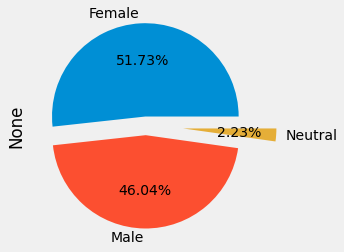

In [27]:
# Seaborn and Matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
data.groupby('Gender').size().plot(kind='pie', autopct = '%2.2f%%', explode = (0.1, 0.1, 0.4))
# Major

In [28]:
# Major

def lowering(x):
  answer = x.lower()
  # What else?
  return answer

data['Major'] = data['Major'].apply(lowering) 
data.groupby('Major').size().head(50)

Major
 spanish language education          1
aaaaaaaaaaaaaa                       1
accounting                           3
aeronautics (air traffic control)    1
aerospace engineering                1
africana studies                     1
agricultural studies                 1
american history                     1
ancient studies                      1
anthropology                         2
applied math                         2
applied mathematics                  1
archaeology                          1
architecture                         2
arcitecture                          1
art                                  1
art education                        1
art history                          2
art historyy                         1
astronomyâ                           1
athletic trainer                     1
athletic training                    1
bachelor of fine arts in theater     1
bfa music                            1
bio                                  2
bio tech           

In [29]:
data.to_csv('cleaned.csv')